## G2M Cab Data Codes

In [10]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Collecting pip

  Attempting uninstall: pip
    Found existing installation: pip 20.2.3
    Uninstalling pip-20.2.3:
      Successfully uninstalled pip-20.2.3


In [11]:
pip install jupyter


In [12]:
!pip install pandas

  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)


In [15]:
!pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp39-cp39-win_amd64.whl (51 kB)


In [20]:
!pip install seaborn

### Loading the Data

In [1]:
import pandas as pd

path = r"C:\Users\sefaa\OneDrive\Desktop\DataGlacier-VC\Task2\DataSets"    

df_cab = pd.read_csv(path+"/Cab_Data.csv", delimiter=",")
df_city = pd.read_csv(path+"/City.csv", delimiter=",")
df_customer = pd.read_csv(path+"/Customer_ID.csv", delimiter=",")
df_transaction = pd.read_csv(path+"/Transaction_ID.csv", delimiter=",")
df_holidays = pd.read_csv(path+"/US Holiday Dates (2016-2018).csv", delimiter=",")

### Understanding what's going on here

In [ ]:
# Checking for unique values
df_cab.Transaction_ID.nunique()
df_transaction.Transaction_ID.nunique()
df_transaction.Transaction_ID.nunique() - df_cab.Transaction_ID.nunique()

# Transactions of unique customer
df_transaction.loc[df_transaction.Customer_ID == 29290, :].head()

# Checking for null values 
print(df_transaction.isnull().sum().sum())

### Merging 
##### I renamed the columns' names from the Excel file to enable merging 

In [ ]:
# First merge
first_merge = pd.merge(df_transaction, df_customer)

# Second merge
second_merge = pd.merge(df_cab, df_city)

# Third merge
third_merge = pd.merge(second_merge, first_merge)

### Creating New Columns to Add "Holiday" Data

##### I worked from Excel file to change the format of the "Date_of_Travle' column
##### I made it in the format of "01-01-16"

In [ ]:
# Creating a month column
third_merge['Day'] = third_merge['Date_of_Travel'].str[3:5]
third_merge['Day'] = third_merge['Day'].astype('int32')
third_merge.head()

# Creating a month column
third_merge['Month'] = third_merge['Date_of_Travel'].str[0:2]
third_merge['Month'] = third_merge['Month'].astype('int32')
third_merge.head()

# Creating a year column
third_merge['Year'] = third_merge['Date_of_Travel'].str[6:8]
third_merge['Year'] = '20' + third_merge['Year']
third_merge.head()

# Final merge
final_merge = pd.merge(third_merge, df_holidays, how= 'left')

### Dealing With Dublicates Values

In [ ]:
# Checking and understanding dublicates
final_merge.Transaction_ID.nunique()
final_merge.Transaction_ID.duplicated().sum()
final_merge.loc[final_merge.Transaction_ID.duplicated(), :]

final_merge.nunique() 
final_merge.duplicated().sum() # Not working 

# Checking the size after removing the duplicates
final_merge.Transaction_ID.drop_duplicates(keep= 'last').shape
final_merge.Transaction_ID.drop_duplicates(keep= 'last').head()

# Creating new dataFrame without duplicates
new_data = final_merge.drop_duplicates(subset=('Transaction_ID'), keep= 'last')
new_data.nunique()

### Cleaning

In [ ]:
# Cleaning the new data
print(new_data.isnull().sum().sum())
new_data.isnull().sum()
new_data.drop('Date', inplace= True, axis= 1) # Holiday data had this extra column

import numpy as np
new_data['Holiday'] = new_data['Holiday'].replace(np.nan, 'No holiday') 
new_data['WeekDay'] = new_data['WeekDay'].replace(np.nan, 'No holiday') 
print(new_data.isnull().sum().sum())

# Separation between Saturday and Sunday in Labor Day Weekend
new_data.loc[new_data['WeekDay'] == "Saturday", "Holiday"] = "Labor Day Weekend (Saturday)"
new_data.loc[new_data['WeekDay'] == "Sunday", "Holiday"] = "Labor Day Weekend (Sunday)"

# Checking from holidays 
new_data.Holiday.nunique()
new_data.nunique()
new_data['Holiday'].unique().tolist()

### New Column 

In [ ]:
# Creating profit column 
new_data['Profit'] = new_data['Price_Charged'] - new_data['Cost_of_Trip']

### Download the Full Data

In [ ]:
# Download the dataframe 
new_data.to_csv("Final cab data.csv", index= False)

### ---------------- Visualizations ---------------------


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

# Read the full data
path = r"C:\Users\sefaa\OneDrive\Desktop\DataGlacier-VC\Task2\DataSets"    
all_df = pd.read_csv(path+"/Final cab data.csv", delimiter=",")

# Take the data of each cab
pink_df = all_df.loc[all_df['Company'] == 'Pink Cab']
yellow_df = all_df.loc[all_df['Company'] == 'Yellow Cab']

### Profits Table

In [4]:
# Results of profit table 
pink_df['Profit'].sum()
yellow_df['Profit'].sum()
pink_df.Transaction_ID.nunique()
yellow_df.Transaction_ID.nunique()
pink_avg_prf = pink_df['Profit'].sum() / pink_df.Transaction_ID.nunique() 
yellow_avg_prf = yellow_df['Profit'].sum() / yellow_df.Transaction_ID.nunique() 

|Company|Profit|Total Rides|Profit per Ride|
|-------|------|-----------|---------------|
|Pink Cab|5,307,328|84,711|62.652|
|Yellow Cab|44,020,373|274,681|160.259|

### Ages Table

In [7]:
# Pink Cab
pink_df['Age'].describe()

pink_df_2016 = pink_df.loc[pink_df['Year'] == 2016]
pink_2016_ages = pink_df_2016.Age.count()
pink_df_2017 = pink_df.loc[pink_df['Year'] == 2017]
pink_2017_ages = pink_df_2017.Age.count()
pink_df_2018 = pink_df.loc[pink_df['Year'] == 2018]
pink_2018_ages = pink_df_2018.Age.count()

# Age Groups for 2016
subset_age1_pink = pink_df_2016[(pink_df_2016['Age'] >= 18) & (pink_df_2016['Age'] <= 25)]
subset_age2_pink = pink_df_2016[(pink_df_2016['Age'] >= 26) & (pink_df_2016['Age'] <= 40)]
subset_age3_pink = pink_df_2016[(pink_df_2016['Age'] >= 41) & (pink_df_2016['Age'] <= 60)]
subset_age4_pink = pink_df_2016[(pink_df_2016['Age'] >= 61)]
# Find the Percentage of Customers 
subset_age1_pink['Age'].count() / pink_2016_ages
subset_age2_pink['Age'].count() / pink_2016_ages
subset_age3_pink['Age'].count() / pink_2016_ages
subset_age4_pink['Age'].count() / pink_2016_ages


# Age Groups for 2017
subset_age1_pink = pink_df_2017[(pink_df_2017['Age'] >= 18) & (pink_df_2017['Age'] <= 25)]
subset_age2_pink = pink_df_2017[(pink_df_2017['Age'] >= 26) & (pink_df_2017['Age'] <= 40)]
subset_age3_pink = pink_df_2017[(pink_df_2017['Age'] >= 41) & (pink_df_2017['Age'] <= 60)]
subset_age4_pink = pink_df_2017[(pink_df_2017['Age'] >= 61)]
# Find the Percentage of Customers 
subset_age1_pink['Age'].count() / pink_2017_ages
subset_age2_pink['Age'].count() / pink_2017_ages
subset_age3_pink['Age'].count() / pink_2017_ages
subset_age4_pink['Age'].count() / pink_2017_ages


# Age Groups for 2018
subset_age1_pink = pink_df_2018[(pink_df_2018['Age'] >= 18) & (pink_df_2018['Age'] <= 25)]
subset_age2_pink = pink_df_2018[(pink_df_2018['Age'] >= 26) & (pink_df_2018['Age'] <= 40)]
subset_age3_pink = pink_df_2018[(pink_df_2018['Age'] >= 41) & (pink_df_2018['Age'] <= 60)]
subset_age4_pink = pink_df_2018[(pink_df_2018['Age'] >= 61)]
# Find the Percentage of Customers 
subset_age1_pink['Age'].count() / pink_2018_ages
subset_age2_pink['Age'].count() / pink_2018_ages
subset_age3_pink['Age'].count() / pink_2018_ages
subset_age4_pink['Age'].count() / pink_2018_ages

0.05394063459570113

#### Pink Cab - Customer segmentation by agegroup 
|Age|18 - 25|26 - 40|41 - 60|60+|
|----|-------|-------|-------|---|
|2016|0.257|0.474|0.213|0.055|
|2017|0.266|0.470|0.211|0.053|
|2018|0.259|0.473|0.214|0.054|

In [8]:
# Yellow Cab
yellow_df['Age'].describe()

yellow_df_2016 = yellow_df.loc[yellow_df['Year'] == 2016]
yellow_2016_ages = yellow_df_2016.Age.count()
yellow_df_2017 = yellow_df.loc[yellow_df['Year'] == 2017]
yellow_2017_ages = yellow_df_2017.Age.count()
yellow_df_2018 = yellow_df.loc[yellow_df['Year'] == 2018]
yellow_2018_ages = yellow_df_2018.Age.count()

# Age Groups for 2016
subset_age1_yellow = yellow_df_2016[(yellow_df_2016['Age'] >= 18) & (yellow_df_2016['Age'] <= 25)]
subset_age2_yellow = yellow_df_2016[(yellow_df_2016['Age'] >= 26) & (yellow_df_2016['Age'] <= 40)]
subset_age3_yellow = yellow_df_2016[(yellow_df_2016['Age'] >= 41) & (yellow_df_2016['Age'] <= 60)]
subset_age4_yellow = yellow_df_2016[(yellow_df_2016['Age'] >= 61)]
# Find the Percentage of Customers 
subset_age1_yellow['Age'].count() / yellow_2016_ages
subset_age2_yellow['Age'].count() / yellow_2016_ages
subset_age3_yellow['Age'].count() / yellow_2016_ages
subset_age4_yellow['Age'].count() / yellow_2016_ages


# Age Groups for 2017
subset_age1_yellow = yellow_df_2017[(yellow_df_2017['Age'] >= 18) & (yellow_df_2017['Age'] <= 25)]
subset_age2_yellow = yellow_df_2017[(yellow_df_2017['Age'] >= 26) & (yellow_df_2017['Age'] <= 40)]
subset_age3_yellow = yellow_df_2017[(yellow_df_2017['Age'] >= 41) & (yellow_df_2017['Age'] <= 60)]
subset_age4_yellow = yellow_df_2017[(yellow_df_2017['Age'] >= 61)]
# Find the Percentage of Customers 
subset_age1_yellow['Age'].count() / yellow_2017_ages
subset_age2_yellow['Age'].count() / yellow_2017_ages
subset_age3_yellow['Age'].count() / yellow_2017_ages
subset_age4_yellow['Age'].count() / yellow_2017_ages


# Age Groups for 2018
subset_age1_yellow = yellow_df_2018[(yellow_df_2018['Age'] >= 18) & (yellow_df_2018['Age'] <= 25)]
subset_age2_yellow = yellow_df_2018[(yellow_df_2018['Age'] >= 26) & (yellow_df_2018['Age'] <= 40)]
subset_age3_yellow = yellow_df_2018[(yellow_df_2018['Age'] >= 41) & (yellow_df_2018['Age'] <= 60)]
subset_age4_yellow = yellow_df_2018[(yellow_df_2018['Age'] >= 61)]
# Find the Percentage of Ages 
subset_age1_yellow['Age'].count() / yellow_2018_ages
subset_age2_yellow['Age'].count() / yellow_2018_ages
subset_age3_yellow['Age'].count() / yellow_2018_ages
subset_age4_yellow['Age'].count() / yellow_2018_ages

0.05223175920129863

#### Yellow Cab - Customer segmentation by agegroup 
|Age|18 - 25|26 - 40|41 - 60|60+|
|----|-------|-------|-------|---|
|2016|0.258|0.475|0.215|0.052|
|2017|0.260|0.471|0.217|0.052|
|2018|0.260|0.472|0.215|0.052|

### Genders Table

In [9]:
# Pink Cab
pink_df['Gender'].describe()

pink_2016_genders = pink_df_2016.Gender.count()
pink_2017_genders = pink_df_2017.Gender.count()
pink_2018_genders = pink_df_2018.Gender.count()

# Gender Groups for 2016
pink_2016_male = pink_df_2016.loc[pink_df_2016['Gender'] == 'Male']
pink_2016_female = pink_df_2016.loc[pink_df_2016['Gender'] == 'Female']
# Find the Percentage of Genders
pink_2016_male['Gender'].count() / pink_2016_genders
pink_2016_female['Gender'].count() / pink_2016_genders


# Gender Groups for 2017
pink_2017_male = pink_df_2017.loc[pink_df_2017['Gender'] == 'Male']
pink_2017_female = pink_df_2017.loc[pink_df_2017['Gender'] == 'Female']
# Find the Percentage of Genders
pink_2017_male['Gender'].count() / pink_2017_genders
pink_2017_female['Gender'].count() / pink_2017_genders


# Gender Groups for 2018
pink_2018_male = pink_df_2018.loc[pink_df_2018['Gender'] == 'Male']
pink_2018_female = pink_df_2018.loc[pink_df_2018['Gender'] == 'Female']
# Find the Percentage of Genders
pink_2018_male['Gender'].count() / pink_2018_genders
pink_2018_female['Gender'].count() / pink_2018_genders

0.4480382122142613

#### Pink Cab - Customer segmentation by gender 
|Gender|Male|Female|
|------|----|------|
|2016|0.566|0.433|
|2017|0.556|0.444|
|2018|0.552|0.448|

In [10]:
# Yellow Cab
yellow_df['Gender'].describe()

yellow_2016_genders = yellow_df_2016.Gender.count()
yellow_2017_genders = yellow_df_2017.Gender.count()
yellow_2018_genders = yellow_df_2018.Gender.count()

# Gender Groups for 2016
yellow_2016_male = yellow_df_2016.loc[yellow_df_2016['Gender'] == 'Male']
yellow_2016_female = yellow_df_2016.loc[yellow_df_2016['Gender'] == 'Female']
# Find the Percentage of Genders
yellow_2016_male['Gender'].count() / yellow_2016_genders
yellow_2016_female['Gender'].count() / yellow_2016_genders


# Gender Groups for 2017
yellow_2017_male = yellow_df_2017.loc[yellow_df_2017['Gender'] == 'Male']
yellow_2017_female = yellow_df_2017.loc[yellow_df_2017['Gender'] == 'Female']
# Find the Percentage of Genders
yellow_2017_male['Gender'].count() / yellow_2017_genders
yellow_2017_female['Gender'].count() / yellow_2017_genders


# Gender Groups for 2018
yellow_2018_male = yellow_df_2018.loc[yellow_df_2018['Gender'] == 'Male']
yellow_2018_female = yellow_df_2018.loc[yellow_df_2018['Gender'] == 'Female']
# Find the Percentage of Genders
yellow_2018_male['Gender'].count() / yellow_2018_genders
yellow_2018_female['Gender'].count() / yellow_2018_genders

0.42814552321942007

#### Yellow Cab - Customer segmentation by gender 
|Gender|Male|Female|
|------|----|------|
|2016|0.588|0.412|
|2017|0.574|0.426|
|2018|0.572|0.428|

### Pie Charts

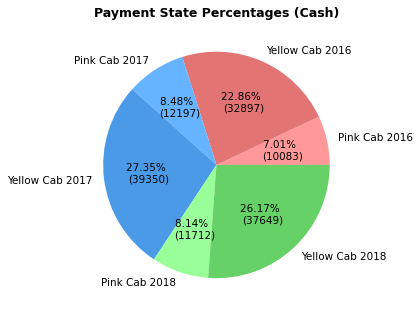

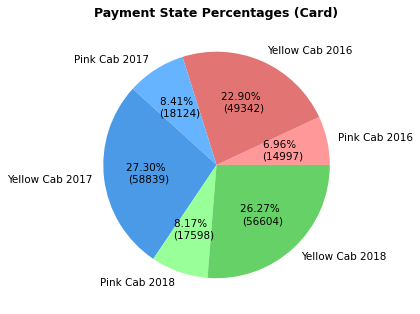

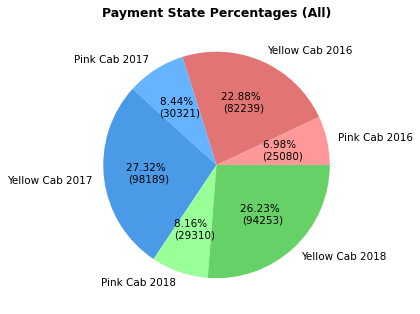

In [4]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  \n({v:d})'.format(p=pct,v=val)
    return my_autopct


# Pie Chart payment state percentages (Cash)
plt.figure(figsize = (5, 5), dpi= 75)
# Collect count of each state
s1 = pink_df.loc[(pink_df.Payment_Mode == 'Cash') & (pink_df.Year == 2016)].count()[0]
s2 = yellow_df.loc[(yellow_df.Payment_Mode == 'Cash') & (yellow_df.Year == 2016)].count()[0]
s3 = pink_df.loc[(pink_df.Payment_Mode == 'Cash') & (pink_df.Year == 2017)].count()[0]
s4 = yellow_df.loc[(yellow_df.Payment_Mode == 'Cash') & (yellow_df.Year == 2017)].count()[0]
s5 = pink_df.loc[(pink_df.Payment_Mode == 'Cash') & (pink_df.Year == 2018)].count()[0]
s6 = yellow_df.loc[(yellow_df.Payment_Mode == 'Cash') & (yellow_df.Year == 2018)].count()[0]
states = [s1, s2, s3, s4, s5, s6]
labels = ['Pink Cab 2016', 'Yellow Cab 2016', 'Pink Cab 2017', 
          'Yellow Cab 2017', 'Pink Cab 2018', 'Yellow Cab 2018']
colors = ['#ff9999','#e37474','#66b3ff','#4a9ae8','#99ff99','#66d166']
plt.pie(states, labels = labels, colors = colors, autopct = make_autopct(states))
plt.title('Payment State Percentages (Cash)', fontdict={'fontweight': 'bold'})
plt.show()


# Pie Chart payment state percentages (Card)
plt.figure(figsize = (5, 5), dpi= 75)
# Collect count of each state
s1 = pink_df.loc[(pink_df.Payment_Mode == 'Card') & (pink_df.Year == 2016)].count()[0]
s2 = yellow_df.loc[(yellow_df.Payment_Mode == 'Card') & (yellow_df.Year == 2016)].count()[0]
s3 = pink_df.loc[(pink_df.Payment_Mode == 'Card') & (pink_df.Year == 2017)].count()[0]
s4 = yellow_df.loc[(yellow_df.Payment_Mode == 'Card') & (yellow_df.Year == 2017)].count()[0]
s5 = pink_df.loc[(pink_df.Payment_Mode == 'Card') & (pink_df.Year == 2018)].count()[0]
s6 = yellow_df.loc[(yellow_df.Payment_Mode == 'Card') & (yellow_df.Year == 2018)].count()[0]
states = [s1, s2, s3, s4, s5, s6]
labels = ['Pink Cab 2016', 'Yellow Cab 2016', 'Pink Cab 2017', 
          'Yellow Cab 2017', 'Pink Cab 2018', 'Yellow Cab 2018']
colors = ['#ff9999','#e37474','#66b3ff','#4a9ae8','#99ff99','#66d166']
plt.pie(states, labels = labels, colors = colors, autopct = make_autopct(states))
plt.title('Payment State Percentages (Card)', fontdict={'fontweight': 'bold'})
plt.show()


# Pie Chart payment state percentages (All)
plt.figure(figsize = (5, 5), dpi= 75)
# Collect count of each state
s1 = pink_df.loc[pink_df['Year'] == 2016].count()[0]
s2 = yellow_df.loc[yellow_df['Year'] == 2016].count()[0]
s3 = pink_df.loc[pink_df['Year'] == 2017].count()[0]
s4 = yellow_df.loc[yellow_df['Year'] == 2017].count()[0]
s5 = pink_df.loc[pink_df['Year'] == 2018].count()[0]
s6 = yellow_df.loc[yellow_df['Year'] == 2018].count()[0]
states = [s1, s2, s3, s4, s5, s6]
labels = ['Pink Cab 2016', 'Yellow Cab 2016', 'Pink Cab 2017',
          'Yellow Cab 2017', 'Pink Cab 2018', 'Yellow Cab 2018']
colors = ['#ff9999','#e37474','#66b3ff','#4a9ae8','#99ff99','#66d166']
plt.pie(states, labels = labels, colors = colors, autopct = make_autopct(states)) #'%.2f %%'
plt.title('Payment State Percentages (All)', fontdict={'fontweight': 'bold'})
plt.show()

### Bar Charts
#### Let's check in which day of the week the cabs have highest transactions 

<ipython-input-12-1763d9f754ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pink_df['WeekDay'] = pd.DatetimeIndex(pink_df['Date_of_Travel']).day_name()


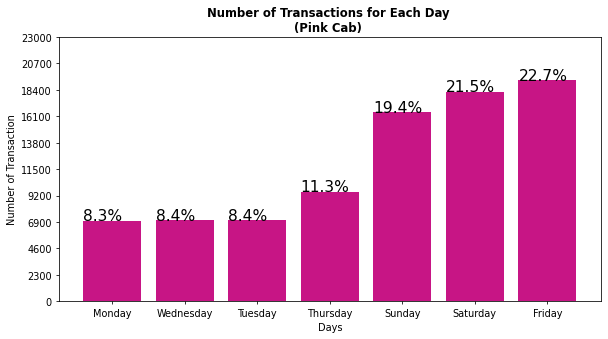

<ipython-input-12-1763d9f754ca>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_df['WeekDay'] = pd.DatetimeIndex(yellow_df['Date_of_Travel']).day_name()


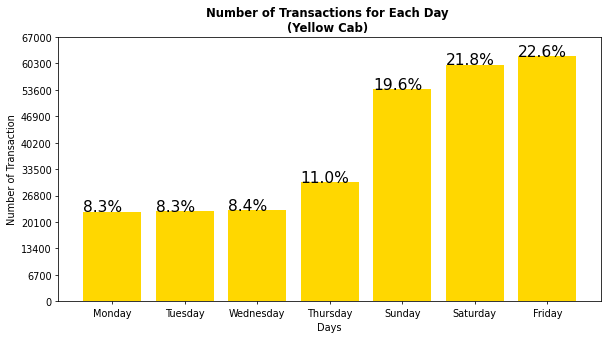

In [12]:
# Bar Chart Transactions for Each Day (Pink Cab)
pink_df['WeekDay'] = pd.DatetimeIndex(pink_df['Date_of_Travel']).day_name()
days_pink = pink_df.groupby('WeekDay').count()['Transaction_ID']
days_pink = days_pink.sort_values()

labels = ['Monday', 'Wednesday', 'Tuesday', 'Thursday', 'Sunday', 
          'Saturday', 'Friday']

plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(labels, days_pink, color = 'mediumvioletred')
plt.title('Number of Transactions for Each Day \n(Pink Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Days')
plt.xticks(rotation=90)
plt.ylabel('Number of Transaction')
yticks = list(range(0, 25300, 2300))

plt.yticks(yticks)
# Add Percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/days_pink.sum()) * 100), 1)
    plt.text(bar.get_x(), y + 20, str(percent) + '%', fontsize = 16)
plt.show()


# Bar Chart Transactions for Each Day (Yellow Cab)
yellow_df['WeekDay'] = pd.DatetimeIndex(yellow_df['Date_of_Travel']).day_name()
days_yellow = yellow_df.groupby('WeekDay').count()['Transaction_ID']
days_yellow = days_yellow.sort_values()

labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday', 
          'Saturday', 'Friday']

plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(labels, days_yellow, color = 'gold')
plt.title('Number of Transactions for Each Day \n(Yellow Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Days')
plt.xticks(rotation=90)
plt.ylabel('Number of Transaction')
yticks = list(range(0, 73700, 6700))

plt.yticks(yticks)
# Add Percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/days_yellow.sum()) * 100), 1)
    plt.text(bar.get_x(), y + 20, str(percent) + '%', fontsize = 16)
plt.show()


#### Let's check in which month of the year the cabs have highest transactions 

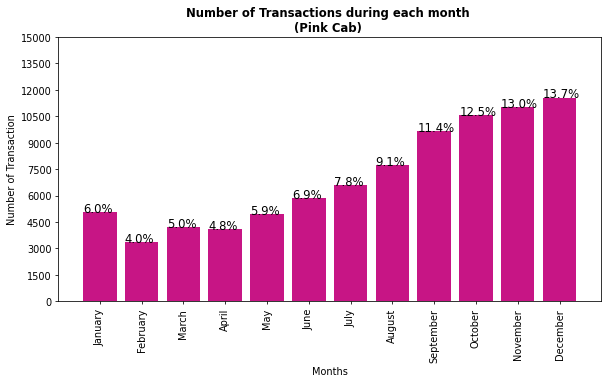

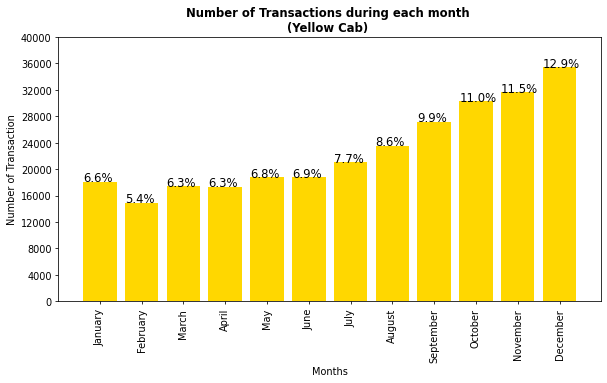

In [6]:
# Count of all Transactions of Each Cab 
alln_pink = pink_df.count()[0] 
alln_yellow = yellow_df.count()[0] 

# Count The Transaction of Each Month 
monthly_tran_pink = pink_df.groupby('Month').count()
monthly_tran_yellow = yellow_df.groupby('Month').count()


# Bar Chart Transactions During Each Month (Pink Cab)
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(month_labels, monthly_tran_pink['Transaction_ID'], color = 'mediumvioletred')
plt.title('Number of Transactions during each month \n(Pink Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Months')
plt.xticks(rotation=90)
plt.ylabel('Number of Transaction')
yticks = list(range(0, 16500, 1500))
plt.yticks(yticks)
# Add Percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/alln_pink) * 100), 1)
    plt.text(bar.get_x(), y, str(percent) + '%', fontsize = 12)
plt.show()


# Bar Chart Transactions During Each Month (Yellow Cab)
plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(month_labels, monthly_tran_yellow['Transaction_ID'], color = 'gold')
plt.title('Number of Transactions during each month \n(Yellow Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Months')
plt.xticks(rotation=90)
plt.ylabel('Number of Transaction')
yticks = list(range(0, 44000, 4000))
plt.yticks(yticks)
# Add Percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/alln_yellow) * 100), 1)
    plt.text(bar.get_x(), y, str(percent) + '%', fontsize = 12)
plt.show()

#### Let's check in which day of December the cabs have highest transactions 

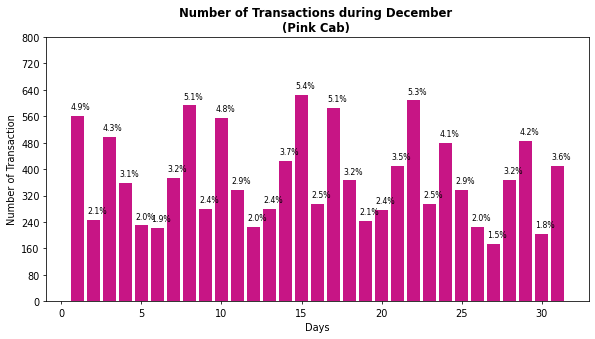

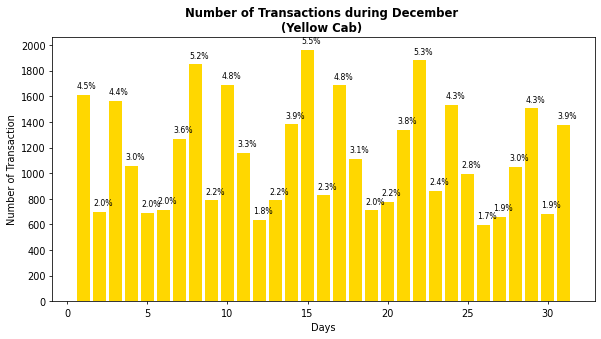

In [7]:
# Take the Data of December 
pink_dec = pink_df.loc[pink_df['Month'] == 12]
yellow_dec = yellow_df.loc[yellow_df['Month'] == 12]

# Count of all December Transactions of Each Cab 
alln_dec_pink = pink_dec.count()[0] 
alln_dec_yellow = yellow_dec.count()[0]

# Count The Transaction of Each Day 
daily_tran_pink = pink_dec.groupby('Day').count()
daily_tran_yellow = yellow_dec.groupby('Day').count()


# Bar Chart Transactions During December (Pink Cab)
day = range(1, 32)
plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(day, daily_tran_pink['Transaction_ID'], color = 'mediumvioletred')
plt.title('Number of Transactions during December \n(Pink Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Days')
plt.ylabel('Number of Transaction')
yticks = list(range(0, 880, 80))
plt.yticks(yticks)
# Add Percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/alln_dec_pink) * 100), 1)
    plt.text(bar.get_x(), y + 20, str(percent) + '%', fontsize = 8)
plt.show()


# Bar Chart Transactions During December (Yellow Cab)
day = range(1, 32)
plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(day, daily_tran_yellow['Transaction_ID'], color = 'gold')
plt.title('Number of Transactions during December \n(Yellow Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Days')
plt.ylabel('Number of Transaction')
yticks = list(range(0, 2200, 200))
plt.yticks(yticks)
# Add Percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/alln_dec_yellow) * 100), 1)
    plt.text(bar.get_x(), y + 50, str(percent) + '%', fontsize = 8)
plt.show()

# Question:
### At this point I had to answer myself a question, after I saw that most of transactions happened in December, does that mean most of the profits is also in December? In different words, the more of transactions means the more of profits? Logiclly the answer is yes, but I wanted to prove it. 

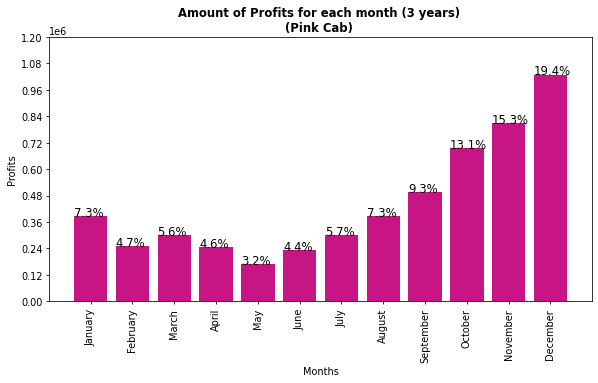

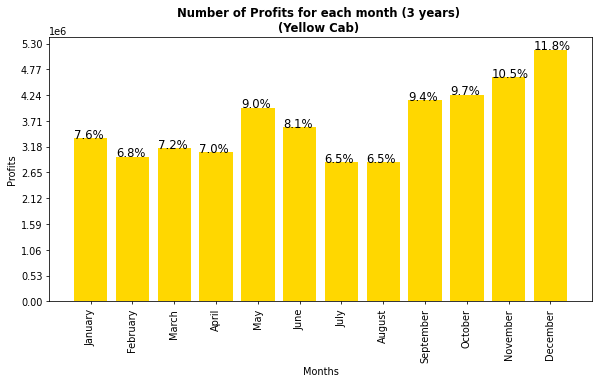

In [14]:
# Sum of All Profits of Each Cab 
prof_sum_pink = pink_df['Profit'].sum()
prof_sum_yellow = yellow_df['Profit'].sum() 


# Count The Profits of Each Month
monthly_prof_pink = []
for i in range (1, 13):
    subset_pink = pink_df.loc[pink_df['Month'] == i]
    subset_prof_pink = subset_pink['Profit'].sum()
    monthly_prof_pink.append(subset_prof_pink)
    
monthly_prof_yellow = []
for i in range (1, 13):
    subset_yellow = yellow_df.loc[yellow_df['Month'] == i]
    subset_prof_yellow = subset_yellow['Profit'].sum()
    monthly_prof_yellow.append(subset_prof_yellow)

    
# Bar Chart Profits During Each Month (Pink Cab)
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']
plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(month_labels, monthly_prof_pink, color = 'mediumvioletred')
plt.title('Amount of Profits for each month (3 years) \n(Pink Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Months')
plt.xticks(rotation=90)
plt.ylabel('Profits')
yticks = list(range(0, 1320000, 120000))
plt.yticks(yticks)
# Add Percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/prof_sum_pink) * 100), 1)
    plt.text(bar.get_x(), y, str(percent) + '%', fontsize = 12)
plt.show()


# Bar Chart Transactions During Each Month (Yellow Cab)
months = range(1, 13)
plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(month_labels, monthly_prof_yellow, color = 'gold')
plt.title('Number of Profits for each month (3 years) \n(Yellow Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Months')
plt.xticks(rotation=90)
plt.ylabel('Profits')
yticks = list(range(0, 5830000, 530000))
plt.yticks(yticks)
# Add Percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/prof_sum_yellow) * 100), 1)
    plt.text(bar.get_x(), y, str(percent) + '%', fontsize = 12)
plt.show()

### As it was expected, most of the profits for both companies was earned in December, let's make more profit analysis to see the differences between the companies  

#### for years

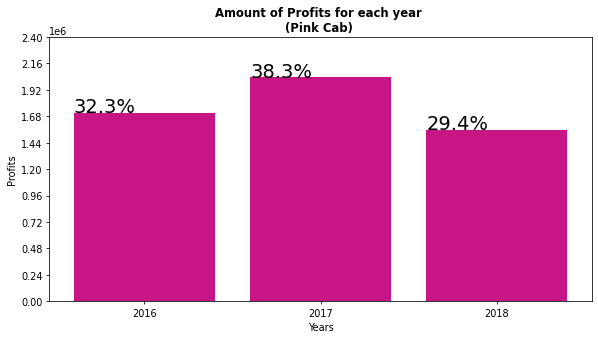

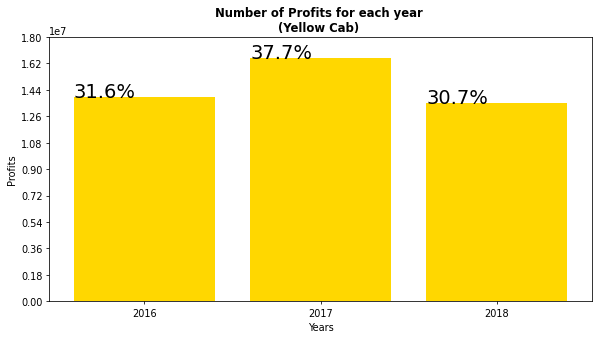

In [15]:
# Count The Profits of Each Year
yearly_prof_pink = []
for i in range (2016, 2019):
    subset_pink = pink_df.loc[pink_df['Year'] == i]
    subset_prof_pink = subset_pink['Profit'].sum()
    yearly_prof_pink.append(subset_prof_pink)
    
yearly_prof_yellow = []
for i in range (2016, 2019):
    subset_yellow = yellow_df.loc[yellow_df['Year'] == i]
    subset_prof_yellow = subset_yellow['Profit'].sum()
    yearly_prof_yellow.append(subset_prof_yellow)

    
# Bar Chart Profits for Each Year (Pink Cab)
years = range(1, 4)
plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(years, yearly_prof_pink, color = 'mediumvioletred')
plt.xticks([1,2,3],['2016', '2017', '2018'])
plt.title('Amount of Profits for each year \n(Pink Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Years')
plt.ylabel('Profits')
yticks = list(range(0, 2640000, 240000))
plt.yticks(yticks)
# Add Percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/prof_sum_pink) * 100), 1)
    plt.text(bar.get_x(), y, str(percent) + '%', fontsize = 20)
plt.show()


# Bar Chart Profits for Each Year (Yellow Cab)
years = range(1, 4)
plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(years, yearly_prof_yellow, color = 'gold')
plt.xticks([1,2,3],['2016', '2017', '2018'])
plt.title('Number of Profits for each year \n(Yellow Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Years')
plt.ylabel('Profits')
yticks = list(range(0, 19800000, 1800000))
plt.yticks(yticks)
# Add Percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/prof_sum_yellow) * 100), 1)
    plt.text(bar.get_x(), y, str(percent) + '%', fontsize = 20)
plt.show()

#### And for days

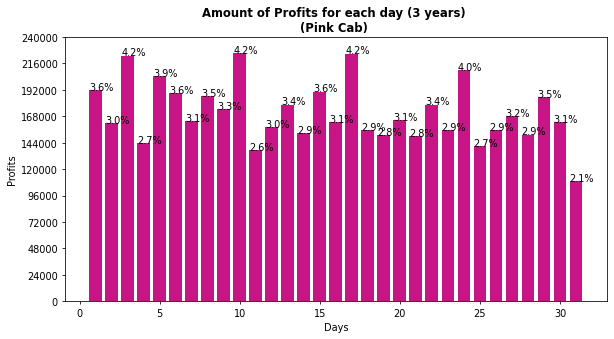

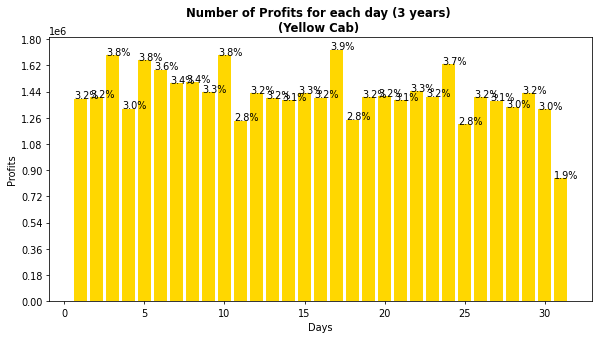

In [16]:
# Count The Profits of Each Day
daily_prof_pink = []
for i in range (1, 32):
    subset_pink = pink_df.loc[pink_df['Day'] == i]
    subset_prof_pink = subset_pink['Profit'].sum()
    daily_prof_pink.append(subset_prof_pink)
    
daily_prof_yellow = []
for i in range (1, 32):
    subset_yellow = yellow_df.loc[yellow_df['Day'] == i]
    subset_prof_yellow = subset_yellow['Profit'].sum()
    daily_prof_yellow.append(subset_prof_yellow)

    
# Bar Chart Profits for Each Year (Pink Cab)
years = range(1, 32)
plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(years, daily_prof_pink, color = 'mediumvioletred')
plt.title('Amount of Profits for each day (3 years) \n(Pink Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Days')
plt.ylabel('Profits')
yticks = list(range(0, 264000, 24000))
plt.yticks(yticks)
# Add Percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/prof_sum_pink) * 100), 1)
    plt.text(bar.get_x(), y, str(percent) + '%', fontsize = 10)
plt.show()


# Bar Chart Profits for Each Year (Yellow Cab)
years = range(1, 32)
plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(years, daily_prof_yellow, color = 'gold')
plt.title('Number of Profits for each day (3 years) \n(Yellow Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Days')
plt.ylabel('Profits')
yticks = list(range(0, 1980000, 180000))
plt.yticks(yticks)
# Add Percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/prof_sum_yellow) * 100), 1)
    plt.text(bar.get_x(), y, str(percent) + '%', fontsize = 10)
plt.show()

### Holiday Analysis 

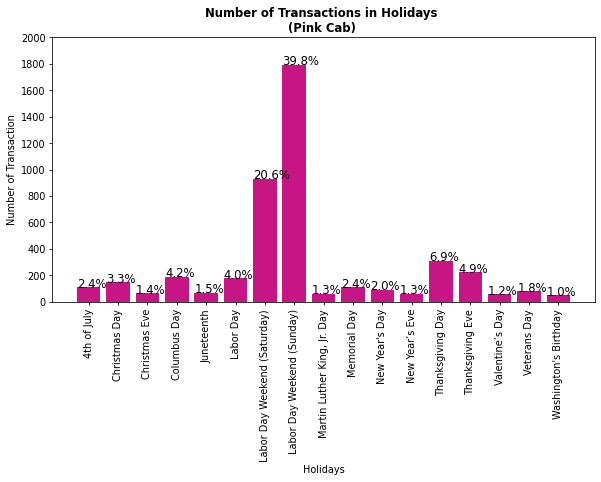

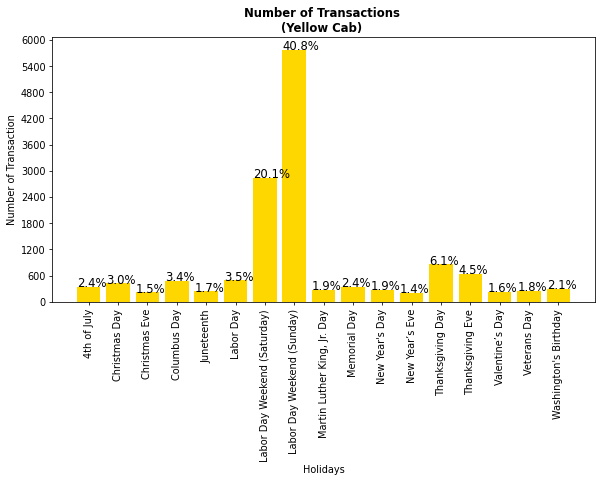

In [18]:
# Count The Holidays of Each Month 
monthly_hol_pink = pink_df.groupby('Holiday').count()
monthly_hol_yellow = yellow_df.groupby('Holiday').count()
monthly_hol_pink = monthly_hol_pink.drop('No holiday')
monthly_hol_yellow = monthly_hol_yellow.drop('No holiday')

# Count of all Transactions in Holidays of Each Cab 
alln_hol_pink = monthly_hol_pink['Transaction_ID'].sum()
alln_hol_yellow = monthly_hol_yellow['Transaction_ID'].sum()


# Bar Chart Transactions in Holidays During the Year (Pink Cab)
months = range(1, 18)
plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(months, monthly_hol_pink['Transaction_ID'], color = 'mediumvioletred')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
           ['4th of July', 'Christmas Day', 'Christmas Eve', 'Columbus Day', 'Juneteenth',
          'Labor Day', 'Labor Day Weekend (Saturday)', 'Labor Day Weekend (Sunday)',
          'Martin Luther King, Jr. Day', 'Memorial Day', "New Year's Day", "New Year’s Eve",
          'Thanksgiving Day', 'Thanksgiving Eve', "Valentine’s Day", 'Veterans Day',
          "Washington's Birthday"], rotation = 90)
plt.title('Number of Transactions in Holidays \n(Pink Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Holidays')
plt.ylabel('Number of Transaction')
yticks = list(range(0, 2200, 200))
plt.yticks(yticks)
# Add Percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/alln_hol_pink) * 100), 1)
    plt.text(bar.get_x(), y, str(percent) + '%', fontsize = 12)
plt.show()


# Bar Chart Transactions in Holidays During the Year (Yellow Cab)
months = range(1, 18)
plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(months, monthly_hol_yellow['Transaction_ID'], color = 'gold')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
           ['4th of July', 'Christmas Day', 'Christmas Eve', 'Columbus Day', 'Juneteenth',
          'Labor Day', 'Labor Day Weekend (Saturday)', 'Labor Day Weekend (Sunday)',
          'Martin Luther King, Jr. Day', 'Memorial Day', "New Year's Day", "New Year’s Eve",
          'Thanksgiving Day', 'Thanksgiving Eve', "Valentine’s Day", 'Veterans Day',
          "Washington's Birthday"], rotation = 90)
plt.title('Number of Transactions \n(Yellow Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Holidays')
plt.ylabel('Number of Transaction')
yticks = list(range(0, 6600, 600))
plt.yticks(yticks)
# Add percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/alln_hol_yellow) * 100), 1)
    plt.text(bar.get_x(), y, str(percent) + '%', fontsize = 12)
plt.show()

### To clarify this analysis, I talked previously about merging the "Holiday" dataset, it contains 19 national holiday. However, after doing the analysis I saw that there is "2" national holidays not existed after the merge step, but they were existed in the Holiday dataset. In other words, there is no transactions only in 2 of the 19 national holidays.

### The two holidays I'm talking about are: Western Easter Holiday & Eastern Easter Holiday 

### City Analysis 

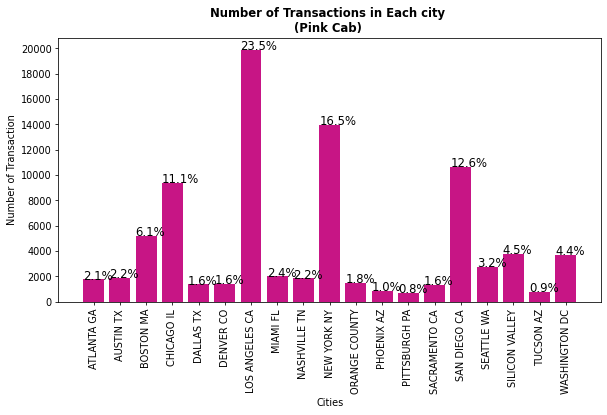

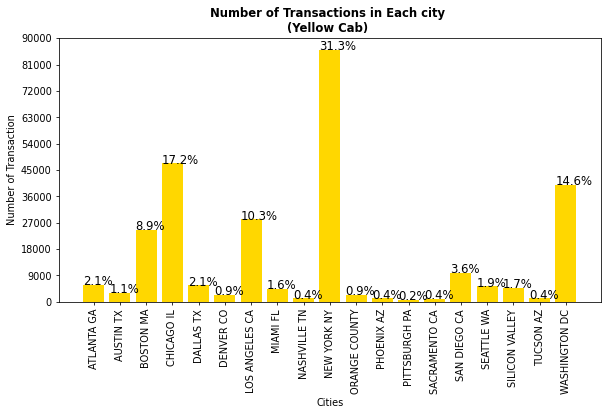

In [19]:
# Bar Chart Transactions in Each City (Pink Cab)
city_users_pink = pink_df.groupby('City').count()['Transaction_ID']
labels = ['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX', 'DENVER CO',
          'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN', 'NEW YORK NY', 'ORANGE COUNTY',
          'PHOENIX AZ', 'PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA',
          'SILICON VALLEY', 'TUCSON AZ', 'WASHINGTON DC']

plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(labels, city_users_pink, color = 'mediumvioletred')
plt.title('Number of Transactions in Each city \n(Pink Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Cities')
plt.xticks(rotation=90)
plt.ylabel('Number of Transaction')
yticks = list(range(0, 22000, 2000))
plt.yticks(yticks)
# Add percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/pink_df['Transaction_ID'].count()) * 100), 1)
    plt.text(bar.get_x(), y, str(percent) + '%', fontsize = 12)
plt.show()



# Bar Chart Transactions in Each City (Yellow Cab)
city_users_yellow = yellow_df.groupby('City').count()['Transaction_ID']

plt.figure(figsize = (10, 5), dpi= 70)
bars = plt.bar(labels, city_users_yellow, color = 'gold')
plt.title('Number of Transactions in Each city \n(Yellow Cab) ', fontdict={'fontweight': 'bold'})
plt.xlabel('Cities')
plt.xticks(rotation=90)
plt.ylabel('Number of Transaction')
yticks = list(range(0, 99000, 9000))
plt.yticks(yticks)
# Add percentage Above Bars
for bar in bars:
    y = bar.get_height()
    percent = round(((y/yellow_df['Transaction_ID'].count()) * 100), 1)
    plt.text(bar.get_x(), y, str(percent) + '%', fontsize = 12)
plt.show()

### Stacked Bar Chart

### Profit Analysis

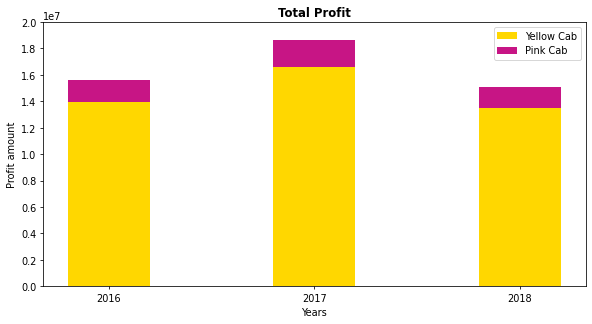

In [21]:
# Stacked Bar Chart for Yearly Profits
labels = ['2016', '2017', '2018']
# Pink Cab
yearly_prof_pink = []
for i in range (2016, 2019):
    subset_pink = pink_df.loc[pink_df['Year'] == i]
    subset_prof_pink = subset_pink['Profit'].sum()
    yearly_prof_pink.append(subset_prof_pink)

# Yellow Cab 
yearly_prof_yellow = []
for i in range (2016, 2019):
    subset_yellow = yellow_df.loc[yellow_df['Year'] == i]
    subset_prof_yellow = subset_yellow['Profit'].sum()
    yearly_prof_yellow.append(subset_prof_yellow)
    
plt.figure(figsize = (10, 5), dpi= 70)
plt.bar(labels, yearly_prof_yellow, 0.4, color = 'gold', label = 'Yellow Cab')
plt.bar(labels, yearly_prof_pink, 0.4, bottom = yearly_prof_yellow, color = 'mediumvioletred', label = 'Pink Cab')
plt.yticks(list(range(0, 22000000, 2000000)))
plt.legend()
plt.ylabel('Profit amount')
plt.xlabel('Years')
plt.title('Total Profit', fontdict={'fontweight': 'bold'})
plt.show()

### City Analysis 

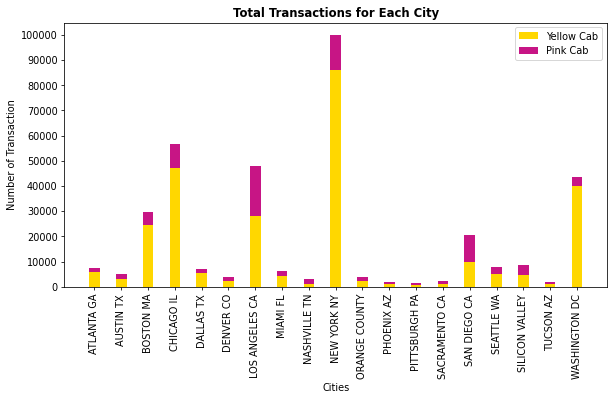

In [20]:
# Stacked Bar Chart for Transactions for Each City
city_users_pink = pink_df.groupby('City').count()['Transaction_ID']
city_users_yellow = yellow_df.groupby('City').count()['Transaction_ID']

labels = ['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX', 'DENVER CO',
          'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN', 'NEW YORK NY', 'ORANGE COUNTY',
          'PHOENIX AZ', 'PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA',
          'SILICON VALLEY', 'TUCSON AZ', 'WASHINGTON DC']

plt.figure(figsize = (10, 5), dpi= 70)
plt.bar(labels, city_users_yellow, 0.4, color = 'gold', label = 'Yellow Cab')
plt.bar(labels, city_users_pink, 0.4, bottom = city_users_yellow, color = 'mediumvioletred', label = 'Pink Cab')
plt.yticks(list(range(0, 110000, 10000)))
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('Number of Transaction')
plt.xlabel('Cities')
plt.title('Total Transactions for Each City', fontdict={'fontweight': 'bold'})
plt.show()

### Heatmaps

<AxesSubplot:title={'center':'Correlations Between All Cab Data'}>

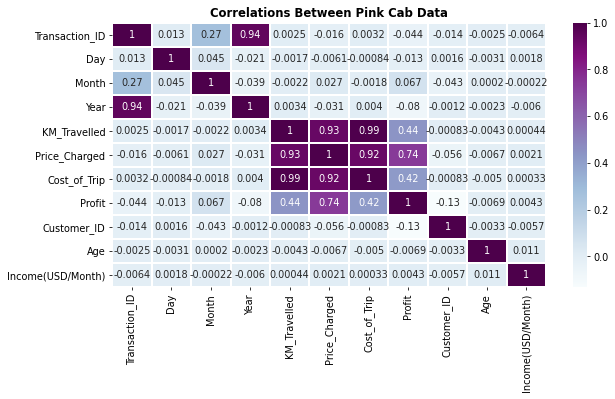

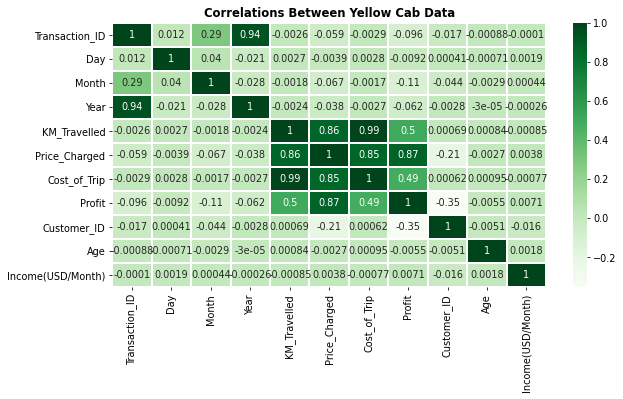

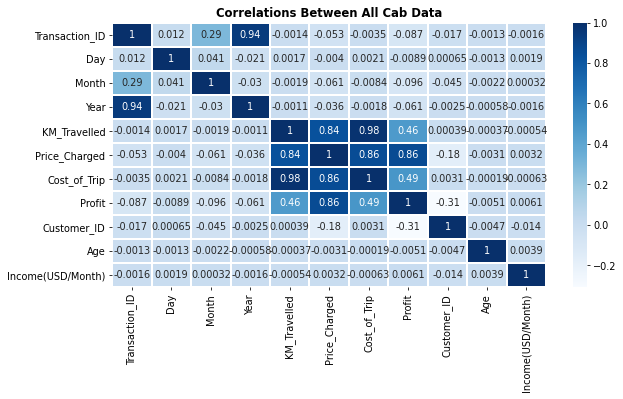

In [21]:
# Heatmap for Pink Cab Data
import seaborn as sb
plt.figure(figsize = (10, 5), dpi= 70)
plt.title('Correlations Between Pink Cab Data', fontdict={'fontweight': 'bold'})
sb.heatmap(pink_df.corr(), annot = True, linewidth = 0.5, cmap ='BuPu')

# Heatmap for Yellow Cab Data
import seaborn as sb
plt.figure(figsize = (10, 5), dpi= 70)
plt.title('Correlations Between Yellow Cab Data', fontdict={'fontweight': 'bold'})
sb.heatmap(yellow_df.corr(), annot = True, linewidth = 0.5, cmap ='Greens')

# Heatmap for All Data
import seaborn as sb
plt.figure(figsize = (10, 5), dpi= 70)
plt.title('Correlations Between All Cab Data', fontdict={'fontweight': 'bold'})
sb.heatmap(all_df.corr(), annot = True, linewidth = 0.5, cmap ='Blues')

# EDA recommendation and hypothesis results

#### According to Profits: The Yellow Cab company have shown difference here in terms of users, profits, and the average profit per ride. Literally Yellow Cab's average profit per ride is two and half times the average profit per ride of Pink Cab.
#### According to Age: Both of the companies have similar age ratios, mostly the focus is between 26-40 with percentage of 0.47 approximately, the ratios of 18-25 and 41-60 are close but the lead is to 18-25. Finally the ratio of 60+ has the lowest ratio with percentage of 0.05 approximately.
#### According to Gender: Also for gender, the two companies have a similar ratios, the ratio of male is always higher than females. One this I need to point to, in Pink Cab company, the ratio of females is slightly higher than the Yellow Cab company.
#### According to Success: The 2017 year was the best for both of the companies in terms of everything, such as profits and number of transactions. December was the best month for profits and number of transactions. Finally, the days 3,10, and 17 had the highest numbers of transactions and amount of profits for both of the companies. 
#### According to Users: The Yellow Cab company have around 3.5 times the number of users that the Pink Cab company have.
#### According to Holidays: There is transactions everyday in the year (even holidays) except for two days, Western Easter Holiday and Eastern Easter Holiday. On the other hand, in the Labor Day Weekend day (Saturday and Sunday), both of the companies had transactions more than the transactions in the other holidays.
#### According to Payment: Both of the cabs' users prefer to pay via Card over Cash, percentages are very similar although. 
#### According to Cities: Most of Yellow Cab company's transactions are in New York City. On the other hand, for Pink Cab company's transactions, mostly they are in Los Angeles City. 
#### According to Correlations: The Yellow Cab company has shown higher correlation between price_charged and Profit than the Pink Cab Company. On the other hand, the Pink Cab company has shown higher correlations between KM_Traveled and Price_Charged, also between Price_Charged and Cost_of_Trip.

## Based on these results, I will recommend the Yellow Cab Company for investment. 